<a href="https://colab.research.google.com/github/Material-Educativo/Tecnicas-heuristicas/blob/main/Funciones_de_prueba.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Funciones de prueba
Las funciones de prueba para técnicas heurísticas son, como su nombre lo sugiere, funciones o reglas de correspondencia empleadas en la evaluación y comparación del desempeño de algoritmos basados en métodos heurísticos.

Son diseñadas para incluir diferentes características que podrían dificultar la localización del óptimo, por ejemplo, existen funciones unimodales, multimodales, escalables, continuas, diferenciables, convexas, etc.

A continuación se presentan algunas funciones empleadas con frecuencia, formulando todos los problemas para minimización. Se debe mencionar que la propuesta de funciones de prueba es una línea de investigación en continuo desarrollo, por lo cual la presentación de una lista exhaustiva se encuentra fuera del alcance de este libro.

A partir de ahora se supondrá que $\overline{x}= x_1,x_2,...,x_n$.

Primero importamos la biblioteca NumPy que será empleada para crear una malla de puntos en dos dimensiones sobre la cual evaluar las funciones, y las bibliotecas matplotlib y mpl_toolkits para poder graficarlas en tres dimensiones.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#Funciones unimodales
Las funciones unimodales se distinguen por tener un único óptimo. En esta sección se presenta la definición de tres ejemplos comunes: la función esfera, la función Rosenbrock y la función Easom.

Las dos primeras poseen la capacidad de extender su dominio a cualquier dimensión, un atributo conocido como escalabilidad. Por otro lado, la función Easom está definida exclusivamente para dos dimensiones.

##Función esfera
En el contexto de optimización, esta función también es conocida como la primera de De Jong. Es una función continua, convexa, y unimodal dada por:

In [ ]:
def funcion_esfera(x):
    """Calcula la función esfera."""
    return np.sum(x**2)

In [ ]:
def evaluar_en_dominio(funcion, limites, n_puntos=100):
    """Evalúa una función en una malla para visualización."""
    # Crear vectores de coordenadas
    x = np.linspace(limites[0], limites[1], n_puntos)
    y = np.linspace(limites[0], limites[1], n_puntos)

    # Crear malla 2D
    X, Y = np.meshgrid(x, y)

    # Evaluar función en cada punto de la malla
    Z = np.zeros_like(X)
    for i in range(n_puntos):
        for j in range(n_puntos):
            Z[i, j] = funcion(np.array([X[i, j], Y[i, j]]))

    return X, Y, Z

In [ ]:
# Evaluar en el óptimo
x_optimo = np.array([0.0, 0.0])
valor_optimo = funcion_esfera(x_optimo)
print(f"f(0, 0) = {valor_optimo}")  # Debe ser 0.0

# Evaluar en un punto aleatorio
x_aleatorio = np.random.uniform(-5.12, 5.12, 2)
valor_aleatorio = funcion_esfera(x_aleatorio)
print(f"f({x_aleatorio[0]:.2f}, {x_aleatorio[1]:.2f}) = {valor_aleatorio:.2f}")

# Generar datos para visualización
X, Y, Z = evaluar_en_dominio(funcion_esfera, [-5, 5])
print(f"Superficie generada: {X.shape[0]}x{X.shape[1]} puntos")

f(0, 0) = 0.0
f(1.30, -3.19) = 11.88
Superficie generada: 100x100 puntos


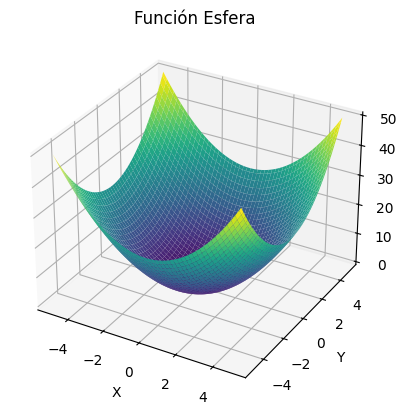

In [ ]:
# Crear figura 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Graficar la superficie de la función
ax.plot_surface(X, Y, Z, cmap='viridis')

# Etiquetas de los ejes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Título
plt.title('Función Esfera')

# Mostrar la figura
plt.show()

## Función Rosenbrock
También conocida como el valle de Rosenbrock, es una función no lineal que se caracteriza por tener el mínimo global dentro de un valle largo y angosto con forma parabólica.

In [ ]:
def funcion_rosenbrock(x):
    """Calcula la función Rosenbrock."""
    n = len(x)
    suma = 0.0
    for i in range(n - 1):
        # Término del valle parabólico (crea la geometría del valle)
        termino1 = 100 * (x[i+1] - x[i]**2)**2

        # Término que empuja hacia x_i = 1
        termino2 = (1 - x[i])**2

        suma += termino1 + termino2

    return suma

In [ ]:
# Evaluar en el óptimo
x_optimo = np.array([1.0, 1.0])
valor_optimo = funcion_rosenbrock(x_optimo)
print(f"f(1, 1) = {valor_optimo}")  # Debe ser 0.0

# Evaluar en el origen (punto subóptimo)
x_origen = np.array([0.0, 0.0])
valor_origen = funcion_rosenbrock(x_origen)
print(f"f(0, 0) = {valor_origen}")  # Valor alto

# Evaluar en un punto sobre el valle (x[1] = x[0]^2)
x_valle = np.array([0.5, 0.25])  # 0.25 = 0.5^2
valor_valle = funcion_rosenbrock(x_valle)
print(f"f(0.5, 0.25) = {valor_valle}")  # Solo penaliza estar lejos de x=1

# Evaluar en dimensiones superiores
x_5d = np.ones(5)  # Óptimo en 5D
print(f"f(1, 1, 1, 1, 1) = {funcion_rosenbrock(x_5d)}")  # Debe ser 0.0

f(1, 1) = 0.0
f(0, 0) = 1.0
f(0.5, 0.25) = 0.25
f(1, 1, 1, 1, 1) = 0.0


##Función de Easom
La función de Easom se caracteriza por tener un único mínimo global ubicado en una región muy pequeña en comparación con el resto del dominio. Fuera de esta región, la función es prácticamente plana, lo que dificulta enormemente la localización del óptimo mediante búsqueda aleatoria o algoritmos sin memoria.

In [ ]:
def funcion_easom(x):
    """Calcula la función Easom (solo para 2D)."""
    if len(x) != 2:
        raise ValueError("La función Easom solo está definida para 2 dimensiones")
    # Componente trigonométrica
    cos_producto = np.cos(x[0]) * np.cos(x[1])
    # Componente exponencial (crea la región pequeña del óptimo)
    distancia_cuadrada = (x[0] - np.pi)**2 + (x[1] - np.pi)**2
    exponencial = np.exp(-distancia_cuadrada)

    return -cos_producto * exponencial

In [ ]:
# Evaluar en el óptimo (pi, pi)
x_optimo = np.array([np.pi, np.pi])
valor_optimo = funcion_easom(x_optimo)
print(f"f(pi, pi) = {valor_optimo:.6f}")  # Debe ser -1.0

# Evaluar lejos del óptimo
x_origen = np.array([0.0, 0.0])
valor_origen = funcion_easom(x_origen)
print(f"f(0, 0) = {valor_origen:.6f}")  # Muy cercano a 0

x_borde = np.array([100.0, 100.0])
valor_borde = funcion_easom(x_borde)
print(f"f(100, 100) = {valor_borde:.10f}")  # Prácticamente 0

# Experimento: probabilidad de caer cerca del óptimo
n_intentos = 10000
encontrados = 0
umbral_cercania = 0.5  # Radio de cercanía en unidades

for _ in range(n_intentos):
    x_random = np.random.uniform(-100, 100, 2)
    distancia = np.linalg.norm(x_random - x_optimo)
    if distancia < umbral_cercania:
        encontrados += 1

probabilidad = (encontrados / n_intentos) * 100
print(f"Probabilidad de caer cerca del óptimo: {probabilidad:.4f}%")

f(pi, pi) = -1.000000
f(0, 0) = -0.000000
f(100, 100) = -0.0000000000
Probabilidad de caer cerca del óptimo: 0.0100%


# Funciones multi-modales

## Función de Ackley

In [ ]:
def funcion_ackley(x):
    """Calcula la función Ackley."""
    n = len(x)

    # Primer término: basado en distancia euclidiana
    suma_cuadrados = np.sum(x**2)
    termino1 = -20 * np.exp(-0.2 * np.sqrt(suma_cuadrados / n))

    # Segundo término: componente oscilatorio
    suma_cosenos = np.sum(np.cos(2 * np.pi * x))
    termino2 = -np.exp(suma_cosenos / n)

    # Constantes de normalización para que f(0) = 0
    return termino1 + termino2 + 20 + np.e


In [ ]:
# Evaluar en el óptimo global
x_optimo = np.array([0.0, 0.0])
valor_optimo = funcion_ackley(x_optimo)
print(f"f(0, 0) = {valor_optimo:.6f}")  # Debe ser 0.0

# Evaluar en un óptimo local cercano
x_local = np.array([0.5, 0.5])
valor_local = funcion_ackley(x_local)
print(f"f(0.5, 0.5) = {valor_local:.6f}")

# Verificar escalabilidad: óptimo en 10D
x_10d = np.zeros(10)
print(f"f(0, ..., 0) en 10D = {funcion_ackley(x_10d):.6f}")

# Comparar valores a diferentes distancias del origen
puntos_prueba = [
    np.array([1.0, 1.0]),
    np.array([5.0, 5.0]),
    np.array([10.0, 10.0])
]

for punto in puntos_prueba:
    valor = funcion_ackley(punto)
    dist = np.linalg.norm(punto)
    print(f"Distancia {dist:.2f}: f = {valor:.4f}")


f(0, 0) = 0.000000
f(0.5, 0.5) = 4.253654
f(0, ..., 0) en 10D = 0.000000
Distancia 1.41: f = 3.6254
Distancia 7.07: f = 12.6424
Distancia 14.14: f = 17.2933


## Función Griewank
La función de Griewank es una función multimodal con muchos mínimos locales distribuidos de manera regular. Presenta una característica interesante: a gran escala se comporta como una función cuadrática (similar a la función esfera), pero a pequeña escala tiene una estructura ondulada creada por el producto de cosenos.

In [ ]:
def funcion_griewank(x):
    """Calcula la función Griewank."""
    n = len(x)

    # Componente cuadrática (tendencia global)
    suma = np.sum(x**2) / 4000.0

    # Componente oscilatoria (óptimos locales)
    producto = 1.0
    for i in range(n):
        producto *= np.cos(x[i] / np.sqrt(i + 1))

    return 1 + suma - producto

In [ ]:
# Evaluar en el óptimo global
x_optimo = np.array([0.0, 0.0])
valor_optimo = funcion_griewank(x_optimo)
print(f"f(0, 0) = {valor_optimo:.6f}")  # Debe ser 0.0

# Evaluar cerca del óptimo (óptimos locales)
x_cerca = np.array([1.0, 1.0])
print(f"f(1, 1) = {funcion_griewank(x_cerca):.6f}")

# Evaluar lejos del óptimo
x_lejos = np.array([100.0, 100.0])
print(f"f(100, 100) = {funcion_griewank(x_lejos):.6f}")

# Demostrar el efecto de la escala
print("\nComparando componentes en diferentes escalas:")
for escala in [1, 10, 100]:
    x = np.array([escala, escala])
    valor = funcion_griewank(x)
    print(f"  Escala {escala:3d}: f = {valor:.6f}")

f(0, 0) = 0.000000
f(1, 1) = 0.589738
f(100, 100) = 6.021421

Comparando componentes en diferentes escalas:
  Escala   1: f = 0.589738
  Escala  10: f = 1.641837
  Escala 100: f = 6.021421


## Función de Rastrigin

Al igual que la función Griewank, la función de Rastrigin es una función multimodal con muchos mínimos locales distribuidos de manera regular. Sin embargo, la estructura de Rastrigin es más pronunciada debido al término coseno que no está amortiguado por una división. Esto crea una superficie altamente irregular con óptimos locales claramente definidos.

In [ ]:
def funcion_rastrigin(x):
    """Calcula la función Rastrigin."""
    n = len(x)

    # Término constante proporcional a la dimensión
    suma = 10 * n

    # Suma de componentes parabólicos y oscilatorios
    for i in range(n):
        suma += x[i]**2 - 10 * np.cos(2 * np.pi * x[i])

    return suma

In [ ]:
# Evaluar en el óptimo global
x_optimo = np.array([0.0, 0.0])
valor_optimo = funcion_rastrigin(x_optimo)
print(f"f(0, 0) = {valor_optimo:.6f}")  # Debe ser 0.0

# Evaluar en óptimos locales cercanos
optimos_locales = [
    np.array([1.0, 0.0]),   # Óptimo local en x
    np.array([0.0, 1.0]),   # Óptimo local en y
    np.array([1.0, 1.0]),   # Óptimo local en ambas
]

print("\nValores en óptimos locales:")
for i, punto in enumerate(optimos_locales, 1):
    valor = funcion_rastrigin(punto)
    print(f"  Punto {i}: f({punto[0]}, {punto[1]}) = {valor:.4f}")

# Demostrar escalabilidad
print("\nEfecto de la dimensionalidad:")
for dim in [2, 5, 10, 20]:
    x = np.zeros(dim)
    valor = funcion_rastrigin(x)
    print(f"  {dim:2d}D: f(0, ..., 0) = {valor:.1f}")

f(0, 0) = 0.000000

Valores en óptimos locales:
  Punto 1: f(1.0, 0.0) = 1.0000
  Punto 2: f(0.0, 1.0) = 1.0000
  Punto 3: f(1.0, 1.0) = 2.0000

Efecto de la dimensionalidad:
   2D: f(0, ..., 0) = 0.0
   5D: f(0, ..., 0) = 0.0
  10D: f(0, ..., 0) = 0.0
  20D: f(0, ..., 0) = 0.0


## Función de Alpine
La función de Alpine es una función no convexa y multimodal que combina componentes trigonométricos con valores absolutos. Esta combinación crea una superficie con múltiples valles y crestas.

El término $|x_i \sin(x_i)|$ genera oscilaciones cuya amplitud crece con $|x_i|$, lo que hace que la función sea más difícil de optimizar lejos del origen.

In [ ]:
def funcion_alpine(x):
    """Calcula la función Alpine."""
    # Suma de valores absolutos de componentes oscilatorios
    return np.sum(np.abs(x * np.sin(x) + 0.1 * x))

In [ ]:
# Evaluar en el óptimo global
x_optimo = np.array([0.0, 0.0])
valor_optimo = funcion_alpine(x_optimo)
print(f"f(0, 0) = {valor_optimo:.6f}")  # Debe ser 0.0

# Evaluar en varios puntos para ver el comportamiento
puntos_prueba = [
    np.array([1.0, 1.0]),
    np.array([3.0, 3.0]),
    np.array([5.0, 5.0]),
    np.array([-2.0, 2.0])
]

print("\nComportamiento de la función:")
for punto in puntos_prueba:
    valor = funcion_alpine(punto)
    print(f"  f({punto[0]:5.1f}, {punto[1]:5.1f}) = {valor:.4f}")

# Analizar componentes individuales en un punto específico
x_test = 3.0
componente = x_test * np.sin(x_test) + 0.1 * x_test
print(f"\nAnálisis en x = {x_test}:")
print(f"  Componente antes del abs: {componente:.4f}")
print(f"  Valor absoluto: {abs(componente):.4f}")

f(0, 0) = 0.000000

Comportamiento de la función:
  f(  1.0,   1.0) = 1.8829
  f(  3.0,   3.0) = 1.4467
  f(  5.0,   5.0) = 8.5892
  f( -2.0,   2.0) = 3.6372

Análisis en x = 3.0:
  Componente antes del abs: 0.7234
  Valor absoluto: 0.7234


# Herramientas de evaluación
Para facilitar el trabajo con funciones de prueba en optimización, es conveniente contar con una estructura que permita evaluar dichas funciones, registrar información relevante y generar herramientas comunes para los experimentos. A continuación se presenta una clase base simplificada y accesible para principiantes, manteniendo las funcionalidades esenciales.

In [ ]:
class FuncionPrueba:
    """Clase sencilla para funciones de prueba en optimización."""

    def __init__(self, nombre, funcion, limites, optimo_x, optimo_f, dimension=2):
        self.nombre = nombre
        self.funcion = funcion
        self.limites = limites      # tupla (min, max)
        self.optimo_x = np.array(optimo_x)
        self.optimo_f = optimo_f
        self.dimension = dimension
        self.num_evaluaciones = 0

    def evaluar(self, x):
        """Evalúa la función y aumenta el contador de llamadas."""
        self.num_evaluaciones += 1
        return self.funcion(x)

    def reiniciar_contador(self):
        """Reinicia el número de evaluaciones realizadas."""
        self.num_evaluaciones = 0

    def punto_aleatorio(self):
        """Genera un punto aleatorio dentro de los límites indicados."""
        low, high = self.limites
        return np.random.uniform(low, high, self.dimension)

    def distancia_al_optimo(self, x):
        """Distancia euclidiana entre el punto x y el óptimo."""
        return np.linalg.norm(np.array(x) - self.optimo_x)

    def error_relativo(self, f_x):
        """Error relativo respecto al valor óptimo."""
        if abs(self.optimo_f) < 1e-10:
            return abs(f_x)
        return abs(f_x - self.optimo_f) / abs(self.optimo_f)

    def __repr__(self):
        return f"FuncionPrueba(nombre='{self.nombre}', dim={self.dimension})"

## Veamos cómo usarla.
Para ilustrar el uso de la clase, se muestra a continuación un ejemplo con la función Esfera.

Nota importante: Recuerda compilar antes la función de quieres evaluar.

In [ ]:
# Supongamos que la función esfera ya está definida:
# def funcion_esfera(x): return np.sum(x**2)

esfera = FuncionPrueba(
    nombre="Esfera",
    funcion=funcion_esfera,
    limites=(-5.12, 5.12),
    optimo_x=[0, 0],
    optimo_f=0.0,
    dimension=2
)

x = esfera.punto_aleatorio()
f = esfera.evaluar(x)
dist = esfera.distancia_al_optimo(x)

print(esfera)
print("Punto generado:", x)
print("Valor:", f)
print("Distancia al óptimo:", dist)
print("Evaluaciones realizadas:", esfera.num_evaluaciones)

FuncionPrueba(nombre='Esfera', dim=2)
Punto generado: [0.68292253 0.45812905]
Valor: 0.6762654054149249
Distancia al óptimo: 0.8223535768846177
Evaluaciones realizadas: 1


# Catálogo de funciones de prueba.

Un catálogo que contiene todas las funciones de prueba en un formato estandarizado. Esto nos permitirá ejecutar experimentos sobre múltiples funciones de manera sistemática.

In [ ]:
def crear_catalogo_funciones(dimension=2):
    """Crea un diccionario con todas las funciones de prueba."""

    catalogo = {
        'esfera': FuncionPrueba(
            nombre="Esfera",
            funcion=funcion_esfera,
            limites=(-5.12, 5.12),
            optimo_x=np.zeros(dimension),
            optimo_f=0.0,
            dimension=dimension
        ),
        'rosenbrock': FuncionPrueba(
            nombre="Rosenbrock",
            funcion=funcion_rosenbrock,
            limites=(-2.048, 2.048),
            optimo_x=np.ones(dimension),
            optimo_f=0.0,
            dimension=dimension
        ),
        'ackley': FuncionPrueba(
            nombre="Ackley",
            funcion=funcion_ackley,
            limites=(-32.768, 32.768),
            optimo_x=np.zeros(dimension),
            optimo_f=0.0,
            dimension=dimension
        ),
        'griewank': FuncionPrueba(
            nombre="Griewank",
            funcion=funcion_griewank,
            limites=(-600, 600),
            optimo_x=np.zeros(dimension),
            optimo_f=0.0,
            dimension=dimension
        ),
        'rastrigin': FuncionPrueba(
            nombre="Rastrigin",
            funcion=funcion_rastrigin,
            limites=(-5.12, 5.12),
            optimo_x=np.zeros(dimension),
            optimo_f=0.0,
            dimension=dimension
        ),
        'alpine': FuncionPrueba(
            nombre="Alpine",
            funcion=funcion_alpine,
            limites=(-10, 10),
            optimo_x=np.zeros(dimension),
            optimo_f=0.0,
            dimension=dimension
        )
    }

    # Agregar Easom solo para 2D
    if dimension == 2:
        catalogo['easom'] = FuncionPrueba(
            nombre="Easom",
            funcion=funcion_easom,
            limites=(-100, 100),
            optimo_x=np.array([np.pi, np.pi]),
            optimo_f=-1.0,
            dimension=2
        )

    return catalogo

In [ ]:
# Crear catálogo para 2D
funciones_2d = crear_catalogo_funciones(dimension=2)

print(f"Funciones disponibles en 2D: {len(funciones_2d)}")
for nombre, funcion in funciones_2d.items():
    print(f"  - {nombre:12s}: óptimo en {funcion.optimo_x}, f* = {funcion.optimo_f}")

# Crear catálogo para 10D
funciones_10d = crear_catalogo_funciones(dimension=10)
print(f"\nFunciones disponibles en 10D: {len(funciones_10d)}")

# Easom no está disponible en 10D
if 'easom' in funciones_10d:
    print("  Easom está disponible")
else:
    print("  Easom no está disponible (solo 2D)")

Funciones disponibles en 2D: 7
  - esfera      : óptimo en [0. 0.], f* = 0.0
  - rosenbrock  : óptimo en [1. 1.], f* = 0.0
  - ackley      : óptimo en [0. 0.], f* = 0.0
  - griewank    : óptimo en [0. 0.], f* = 0.0
  - rastrigin   : óptimo en [0. 0.], f* = 0.0
  - alpine      : óptimo en [0. 0.], f* = 0.0
  - easom       : óptimo en [3.14159265 3.14159265], f* = -1.0

Funciones disponibles en 10D: 6
  Easom no está disponible (solo 2D)


# Experimento comparativo con búsqueda aleatoria
Siguiendo la metodología del capítulo anterior, realizaremos un experimento de búsqueda aleatoria para comparar la dificultad relativa de las diferentes funciones de prueba.

In [ ]:
def busqueda_aleatoria(funcion_prueba, num_iteraciones=500):
    """Realiza búsqueda aleatoria en una función de prueba."""
    funcion_prueba.reiniciar_contador()

    # Inicializar variables de seguimiento
    mejor_x = None
    mejor_f = float('inf')
    historial_mejor = []
    historial_actual = []

    for i in range(num_iteraciones):
        # Generar punto aleatorio en el dominio
        x_actual = funcion_prueba.punto_aleatorio()
        f_actual = funcion_prueba.evaluar(x_actual)

        # Actualizar mejor solución si encontramos algo mejor
        if f_actual < mejor_f:
            mejor_f = f_actual
            mejor_x = x_actual.copy()

        # Guardar historial para análisis posterior
        historial_actual.append(f_actual)
        historial_mejor.append(mejor_f)

    distancia_optimo = funcion_prueba.distancia_al_optimo(mejor_x)
    error_relativo = funcion_prueba.error_relativo(mejor_f)

    resultados = {
        'mejor_x': mejor_x,
        'mejor_f': mejor_f,
        'distancia_optimo': distancia_optimo,
        'error_relativo': error_relativo,
        'historial_actual': historial_actual,
        'historial_mejor': historial_mejor,
        'num_evaluaciones': funcion_prueba.num_evaluaciones
    }

    return resultados


Probemos la búsqueda aleatoria en una función simple.

In [ ]:
# Experimentar con la función esfera
esfera = crear_catalogo_funciones(dimension=2)['esfera']
resultados = busqueda_aleatoria(esfera, num_iteraciones=500)

print(f"Función: {esfera.nombre}")
print(f"Mejor solución: {resultados['mejor_x']}")
print(f"Valor: {resultados['mejor_f']:.6f}")
print(f"Distancia al óptimo: {resultados['distancia_optimo']:.6f}")
print(f"Error relativo: {resultados['error_relativo']:.2e}")
print(f"Evaluaciones usadas: {resultados['num_evaluaciones']}")

Función: Esfera
Mejor solución: [-0.11321445  0.09135234]
Valor: 0.021163
Distancia al óptimo: 0.145474
Error relativo: 2.12e-02
Evaluaciones usadas: 500


# Comparación de todas las funciones
Ejecutaremos el experimento de búsqueda aleatoria en todas las funciones de prueba para compararlas.

In [ ]:
import pandas as pd

In [ ]:
def comparar_funciones(dimension=2, num_iteraciones=500, num_repeticiones=10):
    """Compara todas las funciones mediante búsqueda aleatoria."""
    catalogo = crear_catalogo_funciones(dimension=dimension)
    resultados_globales = {}

    for nombre, funcion in catalogo.items():
        print(f"Experimentando con {nombre}...")

        mejores_valores = []
        distancias = []
        errores = []

        # Repetir experimento varias veces para obtener estadísticas
        for rep in range(num_repeticiones):
            resultado = busqueda_aleatoria(funcion, num_iteraciones)
            mejores_valores.append(resultado['mejor_f'])
            distancias.append(resultado['distancia_optimo'])
            errores.append(resultado['error_relativo'])

        # Calcular estadísticas agregadas
        resultados_globales[nombre] = {
            'mejor_f_promedio': np.mean(mejores_valores),
            'mejor_f_std': np.std(mejores_valores),
            'mejor_f_min': np.min(mejores_valores),
            'distancia_promedio': np.mean(distancias),
            'error_promedio': np.mean(errores),
            'optimo_conocido': funcion.optimo_f
        }

    # Crear DataFrame ordenado por dificultad
    df = pd.DataFrame(resultados_globales).T
    df = df.sort_values('error_promedio')

    return df, resultados_globales

In [ ]:
# Comparación en 2D
print("=== COMPARACIÓN EN 2D ===")
df_2d, res_2d = comparar_funciones(dimension=2, num_iteraciones=500,
                                    num_repeticiones=10)
print(df_2d.to_string())

# Comparación en 10D
print("\n=== COMPARACIÓN EN 10D ===")
df_10d, res_10d = comparar_funciones(dimension=10, num_iteraciones=500,
                                      num_repeticiones=10)
print(df_10d.to_string())

=== COMPARACIÓN EN 2D ===
Experimentando con esfera...
Experimentando con rosenbrock...
Experimentando con ackley...
Experimentando con griewank...
Experimentando con rastrigin...
Experimentando con alpine...
Experimentando con easom...
            mejor_f_promedio   mejor_f_std   mejor_f_min  distancia_promedio  error_promedio  optimo_conocido
esfera          5.335457e-02  4.182459e-02  1.284562e-04            0.203822        0.053355              0.0
rosenbrock      9.891734e-02  7.232199e-02  2.486845e-05            0.330809        0.098917              0.0
alpine          1.145219e-01  9.542661e-02  1.852180e-02            1.494611        0.114522              0.0
griewank        8.037021e-01  2.920619e-01  4.996796e-01           32.798918        0.803702              0.0
easom          -4.361953e-08  1.308586e-07 -4.361952e-07            7.462543        1.000000             -1.0
rastrigin       2.536807e+00  1.267715e+00  8.229959e-01            0.876389        2.536807           